In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Dataset

In [2]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 
  
# Fetch dataset 
dry_bean_dataset = fetch_ucirepo(id=602) 
  
# Load data (as pandas dataframes) 
X = dry_bean_dataset.data.features 
y = dry_bean_dataset.data.targets 

X

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [3]:
y

,Class
0,SEKER
1,SEKER
2,SEKER
3,SEKER
4,SEKER
...,...
13606,DERMASON
13607,DERMASON
13608,DERMASON
13609,DERMASON


# Pre-processing

In [4]:
from sklearn.preprocessing import LabelEncoder

y = np.ravel(y)
# Convert string labels to integer labels

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded

array([5, 5, 5, ..., 3, 3, 3])

In [5]:
# Print the mapping of encoded integer labels to original string labels

print("Mapping of Encoded Labels to Original Labels:")
for encoded_label, original_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{encoded_label} -> {original_label}")

Mapping of Encoded Labels to Original Labels:
BARBUNYA -> 0
BOMBAY -> 1
CALI -> 2
DERMASON -> 3
HOROZ -> 4
SEKER -> 5
SIRA -> 6


In [6]:
beans_names = list(label_encoder.classes_)
beans_names

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [42]:
# Split data into training, calibration and test sets

from sklearn.model_selection import train_test_split

X_train_cal, X_test, y_train_cal, y_test = train_test_split(X, y_encoded, test_size=100, random_state=11)
X_train, X_cal, y_train, y_cal = train_test_split(X_train_cal, y_train_cal, test_size=0.25, random_state=11)

print("Training data size:", X_train.shape, y_train.shape)
print("Calibration data size:", X_cal.shape, y_cal.shape)
print("Test data size:", X_test.shape, y_test.shape)

Training data size: (10133, 16) (10133,)
Calibration data size: (3378, 16) (3378,)
Test data size: (100, 16) (100,)


# Training

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB().fit(X_train, y_train)

# Check accuracy on the calibration set

y_pred = model.predict(X_cal) 
accuracy = metrics.accuracy_score(y_cal, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7575488454706927


Probabilities for a sample data point:
 [1.62253849e-01 1.39224885e-30 8.37746148e-01 1.82113281e-75
 2.45849531e-09 1.74009195e-53 7.48056991e-41]

True Class of the sample data: 5


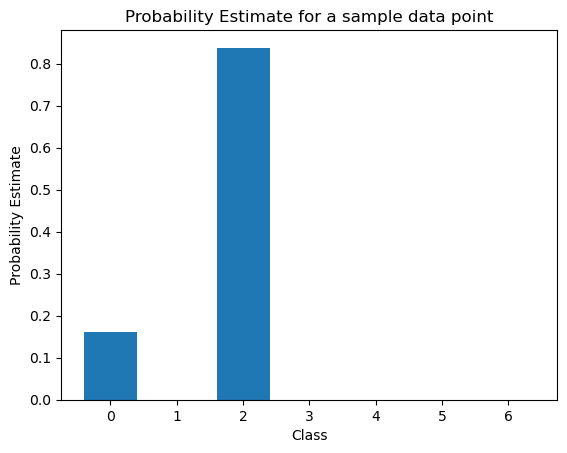

In [44]:
# Get predicted probabilities for each class
predictions = model.predict_proba(X_cal)  

idx = 23
# Extract the predicted probability for each class for a data point
probabilities_for_data_point = predictions[idx]
print('Probabilities for a sample data point:\n',probabilities_for_data_point)

# Get the true class of the selected data point
true_class = y_encoded[idx]
print('\nTrue Class of the sample data:', true_class)

plt.bar(x=range(len(probabilities_for_data_point)), height=probabilities_for_data_point)
plt.xlabel('Class')
plt.ylabel('Probability Estimate')
plt.title('Probability Estimate for a sample data point')
plt.show()

# Calibration

In [45]:
# Calculate adjusted quantile

alpha = 0.15 # means (1-alpha) coverage
print('alpha:', alpha)

n = X_cal.shape[0]
print('Calibration set size:', n)

# Get predicted probabilities for each class
y_cal_predictions = model.predict_proba(X_cal)  
print('Predict Probability shape:', predictions.shape)

# Get the probabaility of the true class
prob_true_class = y_cal_predictions[np.arange(len(y_cal)),y_cal] # The second index taken from y_cal is 1 only for the true class
print('Prob true class shape:', prob_true_class.shape)

y_cal_scores = 1-prob_true_class # Larger conformal scores encode worse aggrement between X and y

q_level = np.ceil((n+1)*(1-alpha))/n # finite-size correction
print("q-level", q_level)

qhat = np.quantile(y_cal_scores, q_level)
print("qhat", qhat)


alpha: 0.15
Calibration set size: 3378
Predict Probability shape: (3378, 7)
Prob true class shape: (3378,)
q-level 0.8505032563647128
qhat 0.8735675244396051


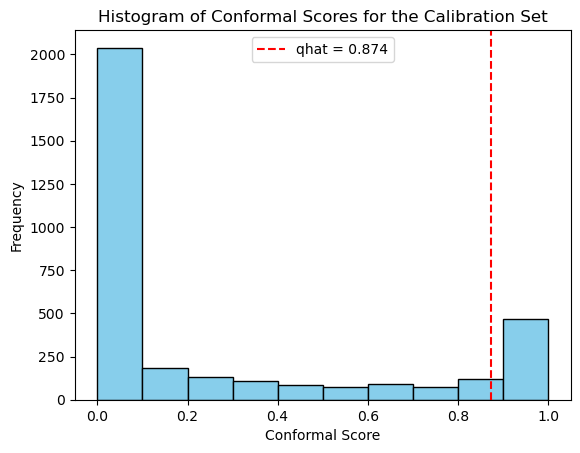

In [46]:
# Flatten the array of conformal scores
flat_scores = y_cal_scores.flatten()

# Plot histogram of frequency of conformal scores
plt.hist(flat_scores, bins=10, color='skyblue', edgecolor='black')

# Add vertical dotted line denoting qhat
plt.axvline(x=qhat, color='red', linestyle='--', label=f'qhat = {qhat:.3f}')
plt.xlabel('Conformal Score')
plt.ylabel('Frequency')
plt.title('Histogram of Conformal Scores for the Calibration Set')
plt.legend()
plt.show()

# Predictions

In [47]:
id = 2
y_test_predictions = model.predict_proba(X_test)
print('X_test predicted scores:\n', y_test_predictions[id])

predictions_set = (1-y_test_predictions <= qhat)
print('\nPrediction set:\n', predictions_set[id])
print('\nTrue class:', y_test[id])

accepted_test_set = np.zeros(len(predictions_set[id]))
for i in range(len(predictions_set[id])):
    if predictions_set[id][i]:
        accepted_test_set[i] = y_test_predictions[id][i]


# Create a list to represent the heights of the bars of the true class
true_bar_heights = [0] * len(predictions_set[id])
true_bar_heights[y_test[id]] = 1


X_test predicted scores:
 [5.31871940e-01 6.02122501e-31 4.68128053e-01 1.54048866e-68
 6.96089668e-09 6.47527911e-47 9.28043054e-37]

Prediction set:
 [ True False  True False False False False]

True class: 0


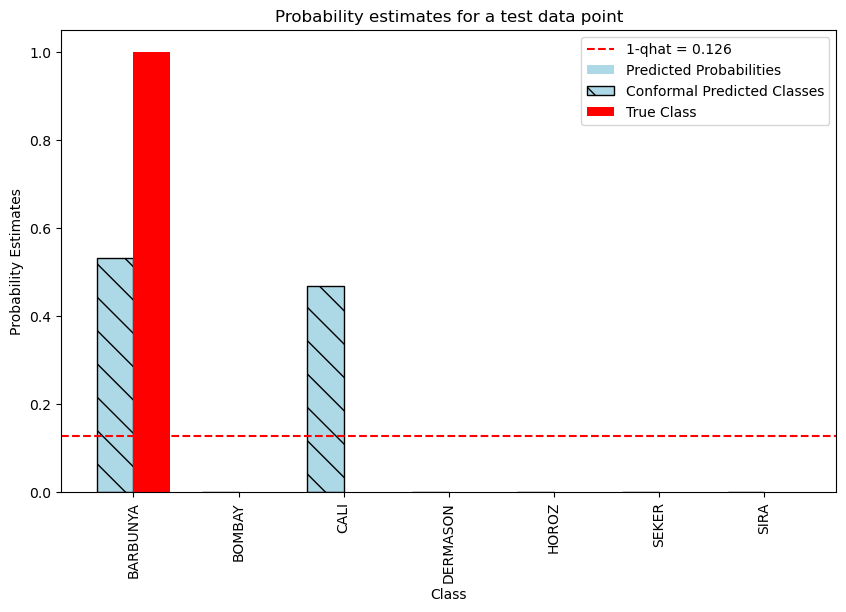

In [48]:
x=list(range(len(y_test_predictions[id])))

bar_width = 0.35

plt.figure(figsize=(10, 6))

plt.bar(x, y_test_predictions[id], width=bar_width, color='lightblue', label='Predicted Probabilities')
plt.bar(x, accepted_test_set, width=bar_width, color='lightblue', edgecolor='black', hatch='\\', label='Conformal Predicted Classes')
plt.axhline(y=1-qhat, color='red', linestyle='--', label=f'1-qhat = {1-qhat:.3f}')

plt.bar([i + bar_width for i in x], true_bar_heights, width=bar_width, color='red', label='True Class')

xticks_positions = [i + bar_width / 2 for i in x]
plt.xticks(xticks_positions, beans_names, rotation=90, fontsize=10)

plt.xlabel('Class')
plt.ylabel('Probability Estimates')
plt.title('Probability estimates for a test data point')
plt.legend()
plt.show()
